## Outliers

An outlier is an observation that lies outside the overall pattern of a distribution __[Moore and McCabe, 1999]__.

- Outliers can either be treated special completely ignored 

- E.g., Fraudulant transactions are outliers, but since we want to avoid them, they must be paid special attention 

- If we think that the outliers are errors, we should remove them 


## Which of the ML models care about Outliers?

Affected models: 

- AdaBoost 
- Linear models
- Linear regression
- Neural Networks (if the number is high)
- Logistic regression 
- KMeans
- Heirarchical Clustering 
- PCA

Unaffected models:

- Decision trees
- Naive bayes
- SVMs
- Random forest 
- Gradient boosted trees 
- K-Nearest Neighbors


### Identification

- Extreme Value Analysis
  - IQR = 75th quantile - 25th quantile
  - Upper boundary = 75th quantile + (IQR * 1.5)
  - Lower boundary = 25th quantile - (IQR * 1.5)
  - Upper Extreme boundary = 75th quantile + (IQR * 3)
  - Lower Extreme boundary = 25th quantile - (IQR * 3)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train_date.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data.head()

,Date,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,12/6/2019,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,12/7/2019,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,12/8/2019,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,12/9/2019,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,12/10/2019,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Age'].min()

0.42

In [5]:
data['Age'].max()

80.0

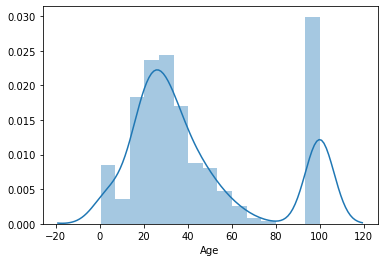

In [6]:
sns.distplot(data['Age'].fillna(100))

Text(0, 0.5, '#')

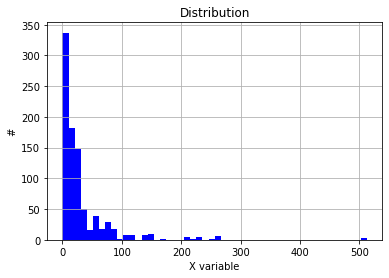

In [7]:
fig = data['Fare'].hist(bins=50, color='blue')
fig.set_title('Distribution')
fig.set_xlabel('X variable')
fig.set_ylabel('#')

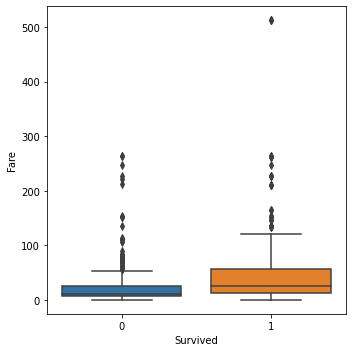

In [8]:
# Outliers according to the quantiles + 1.5 IQR 
sns.catplot(x="Survived", y="Fare", kind="box", data=data)
sns.despine(left=False, right=False, top=False)

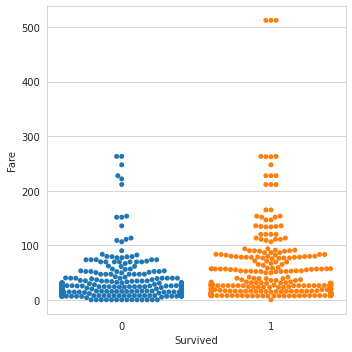

In [9]:
sns.set_style("whitegrid")
sns.catplot(x="Survived", y="Fare", kind="swarm", data=data)
sns.despine(left=False, right=False, top=False)

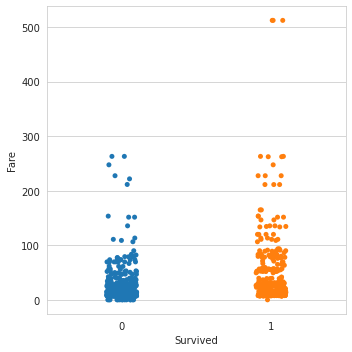

In [10]:
sns.set_style("whitegrid")
sns.catplot(x="Survived", y="Fare",  data=data);
sns.despine(left=False, right=False, top=False)

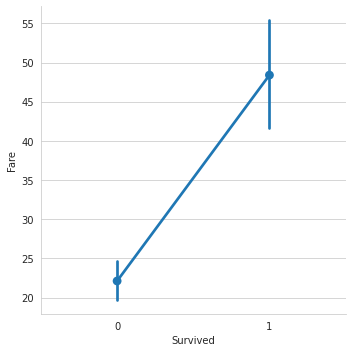

In [11]:
fig = sns.catplot(x="Survived", y="Fare",
            kind="point", data=data)

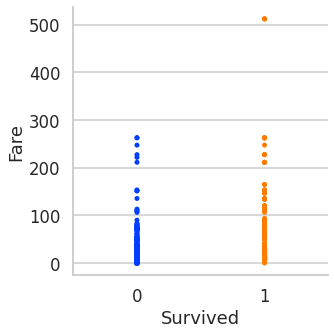

In [12]:
sns.set_context("talk")
sns.set_palette("bright")
sns.catplot(x="Survived", y="Fare", jitter = False, data=data);

In [13]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# Identify outliers according to IQR
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)

lower_bnd = data['Fare'].quantile(0.25) - (IQR * 1.5)
upper_bnd = data['Fare'].quantile(0.75) + (IQR * 1.5)

upper_bnd, lower_bnd, IQR

(65.6344, -26.724, 23.0896)

In [15]:
# Identify outliers according to extreme IQR
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)

ex_lower_bnd = data['Fare'].quantile(0.25) - (IQR * 3)
ex_upper_bnd = data['Fare'].quantile(0.75) + (IQR * 3)

ex_upper_bnd, ex_lower_bnd, IQR

(100.2688, -61.358399999999996, 23.0896)

In [16]:
print('total rows: {}'.format(data.shape[0]))
print('rows above IQR boundary: {}'.format(
    data[data['Fare'] > upper_bnd].shape[0]))
print('rows above extreme IQR boundary: {}'.format(
    data[data['Fare'] > ex_upper_bnd].shape[0]))

total rows: 891
rows above IQR boundary: 116
rows above extreme IQR boundary: 53


In [17]:
print('rows above IQR boundary: {}'.format(
    100* data[data['Fare'] > upper_bnd].shape[0]/data.shape[0]))
print('rows above extreme IQR boundary: {}'.format(
    100* data[data['Fare'] > ex_upper_bnd].shape[0]/data.shape[0]))

rows above IQR boundary: 13.019079685746352
rows above extreme IQR boundary: 5.948372615039282


In [18]:
# Get outliers
outliers = data[data['Fare']>ex_upper_bnd]
outliers.groupby('Survived')['Fare'].count()

Survived
0    14
1    39
Name: Fare, dtype: int64

In [19]:
outliers = data[data['Fare']>ex_upper_bnd]
outliers.groupby('Cabin')['Fare'].count()

Cabin
B101               1
B3                 1
B5                 2
B51 B53 B55        1
B57 B59 B63 B66    2
B58 B60            2
B78                1
B80                1
B96 B98            4
C125               2
C22 C26            3
C23 C25 C27        4
C32                1
C45                1
C62 C64            1
C65                2
C68                2
C7                 1
C70                1
C82                1
C86                1
C91                1
C95                1
C99                1
D36                2
D48                1
E34                1
E40                1
Name: Fare, dtype: int64

In [20]:
outliers = data[data['Fare']>ex_upper_bnd]
outliers.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

Age exploration

Text(0, 0.5, '#')

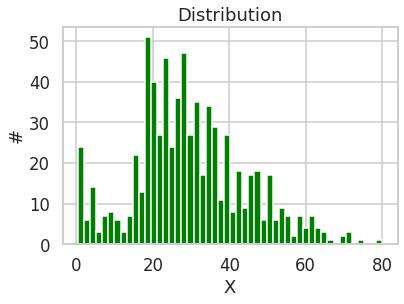

In [21]:
# First let's plot the histogram to get an idea of the distribution
fig = data.Age.hist(bins=50, color='green')
fig.set_title('Distribution')
fig.set_xlabel('X')
fig.set_ylabel('#')

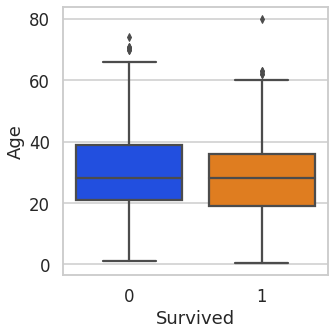

In [22]:
# Outliers according to the quantiles + 1.5 IQR 
sns.catplot(x="Survived", y="Age", kind="box", data=data)
sns.despine(left=False, right=False, top=False)

In [23]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
upper_bnd = data['Age'].mean() + 1.5* data['Age'].std()
lower_bnd = data['Age'].mean() - 1.5* data['Age'].std()

upper_bnd, lower_bnd

(51.48886364555989, 7.909371648557755)

In [25]:
ex_upper_bnd = data['Age'].mean() + 3* data['Age'].std()
ex_lower_bnd = data['Age'].mean() - 3* data['Age'].std()

ex_upper_bnd, ex_lower_bnd

(73.27860964406095, -13.88037434994331)

In [26]:
print('total rows: {}'.format(data.shape[0]))
print('rows above IQR boundary: {}'.format(
    data[data['Age'] > upper_bnd].shape[0]))
print('rows above extreme IQR boundary: {}'.format(
    data[data['Age'] > ex_upper_bnd].shape[0]))

total rows: 891
rows above IQR boundary: 57
rows above extreme IQR boundary: 2


In [27]:
print('total rows: {}'.format(data.shape[0]))
print('rows below IQR boundary: {}'.format(
    data[data['Age'] < lower_bnd].shape[0]))
print('rows below extreme IQR boundary: {}'.format(
    data[data['Age'] < ex_lower_bnd].shape[0]))

total rows: 891
rows below IQR boundary: 50
rows below extreme IQR boundary: 0


In [28]:
print('rows above IQR boundary: {}'.format(
    100* data[data['Age'] > upper_bnd].shape[0]/data.shape[0]))
print('rows above extreme IQR boundary: {}'.format(
    100* data[data['Age'] > ex_upper_bnd].shape[0]/data.shape[0]))

rows above IQR boundary: 6.397306397306397
rows above extreme IQR boundary: 0.2244668911335578


In [29]:
print('rows lower IQR boundary: {}'.format(
    100* data[data['Age'] < lower_bnd].shape[0]/data.shape[0]))
print('rows lower extreme IQR boundary: {}'.format(
    100* data[data['Age'] < ex_lower_bnd].shape[0]/data.shape[0]))

rows lower IQR boundary: 5.611672278338945
rows lower extreme IQR boundary: 0.0


## Get Out, LIARS! 

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
data.columns

Index(['Date', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
data = data.drop(['Date'], axis=1)

In [33]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
data[['Fare','Age']].isnull().mean()

Fare    0.000000
Age     0.198653
dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0),
                                                    data['Survived'],
                                                    test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [0]:
# We will cap the values of outliers 
data_processed = data.copy()

_temp = np.ceil(data['Age'].mean() + 3* data['Age'].std())
data_processed.loc[data_processed.Age >= _temp, 'Age'] = _temp

_temp = np.ceil(data['Fare'].quantile(0.75) + (IQR * 3))

data_processed.loc[data_processed.Fare > _temp, 'Fare'] = _temp

X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(
    data_processed[['Age', 'Fare']].fillna(0),
    data_processed['Survived'],
    test_size=0.2)

In [37]:
print(X_train.shape)
print(X_train_processed.shape)
print(X_test.shape)
print(X_test_processed.shape)

(712, 2)
(712, 2)
(179, 2)
(179, 2)


In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.664804469273743
0.6815642458100558


In [39]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6703910614525139
0.6927374301675978


In [40]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6703910614525139
0.6927374301675978


In [41]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6703910614525139
0.6927374301675978


In [42]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6815642458100558
0.6703910614525139


In [43]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.4748603351955307
0.6703910614525139


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6703910614525139
0.6759776536312849


In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6480446927374302
0.6815642458100558


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.7150837988826816
0.7150837988826816


In [47]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6703910614525139
0.6983240223463687


In [48]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.5977653631284916
0.6759776536312849


In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6703910614525139
0.6927374301675978


In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_processed,y_train_processed)
y_pred_processed = classifier.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(accuracy_score(y_test_processed, y_pred_processed))

0.6815642458100558
0.6145251396648045
